## Python statistics essential training - 03_03_histograms

In [2]:
#meta 4/7/2020
#Ch3. Visualizing and Describing Data
#my code and solution code bits

In [3]:
import numpy as np
import scipy.stats
import pandas as pd

In [19]:
import matplotlib
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [5]:
import re
import mailbox
import csv

# Plot Distributions
The job of statistics is to describe variation.  We look at ways to describe and visualize the variation in a single, quantitative variable, namely the distribution of the variable.

# Gapminder
Identifying and explaining global trends in data with the late statistician and public health expert Hans Rosling.

- book Factfulness  
- website gapminder.org

## 0. Load Data
A few data sets that describe the distribution of incomes per person, and per day, in China, and in the U.S., respectively, in 1965, and 2015 ( given in 2011 equivalent dollars).

Src: generated these data sets using a few simple numbers about the Chinese and American economies from Gapminder.org Thus, they should be understood to be qualitative, and not accurate representations of the truth.

Each entry represents  
- avg income of a variable number of people, depending on the size of the country's population in that year
- pre-generated a column containing the base 10 logarithm of the income.

In [7]:
china1965 = pd.read_csv('lynda_data/income-1965-china.csv')
china2015 = pd.read_csv('lynda_data/income-2015-china.csv')
usa1965 = pd.read_csv('lynda_data/income-1965-usa.csv')
usa2015 = pd.read_csv('lynda_data/income-2015-usa.csv')

china1965.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
income          1000 non-null float64
log10_income    1000 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


## 1. Plot

### 1.1 Boxplot
Visualizes coverage intervals.  
The whiskers are set at 150 and 66%, respectively of the quantiles.

Points below and above whiskers are considered flyers so they're not typical and they may even be outliers. That is, point that are suspicious and may reflect measurement errors.

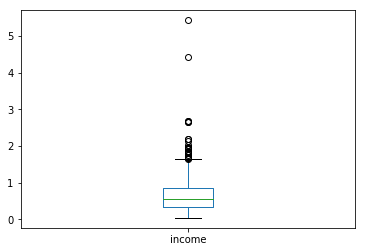

In [11]:
china1965.income.plot(kind='box')

#### Compare China and the U.S.

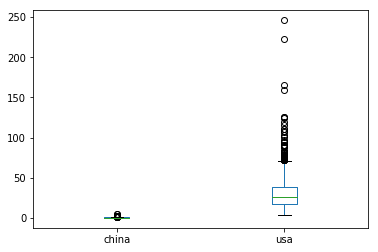

In [16]:
#make a single dataframe to plot the boxes together
pd.DataFrame({'china': china1965.income, 'usa': usa1965.income}).plot(kind='box')

The scales are so different that we don't see much, so it's better to make box plots of the logarithm of the income.

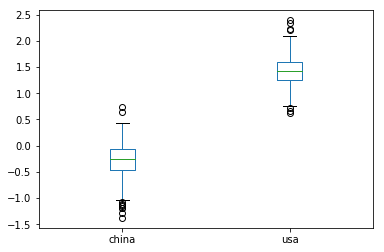

In [17]:
pd.DataFrame({'china': china1965.log10_income, 'usa': usa1965.log10_income}).plot(kind='box')

This shows clearly the fact of 50 between the two distributions. 

### 1.2 Histogram
A much richer visualization of its distribution is a histogram. A histogram divides the data into a set of contiguous bins and each bin shows the count of data points.  We also plot our descriptive statistics as vertical lines on top of the histogram.

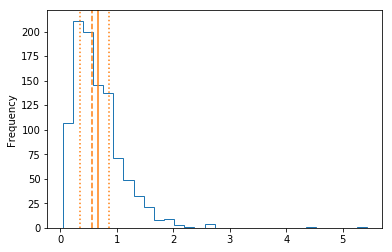

In [31]:
china1965.income.plot(kind='hist',histtype='step',bins=30)

#plot vertical lines
plt.axvline(china1965.income.mean(),c='C1')
plt.axvline(china1965.income.median(),c='C1',linestyle='--')
plt.axvline(china1965.income.quantile(0.25),c='C1',linestyle=':')
plt.axvline(china1965.income.quantile(0.75),c='C1',linestyle=':')

We see where most of the incomes lie in China in 1965, with the most frequent income somewhere around half a dollar.  We also see that the mean and the median are close, as is often the case.

### 1.3 Density Plot
A density plot is effectively a smooth histogram which approximates the continuous density of the variable ( some calculus)


(0, 3, 0.0, 1.2342999882944066)

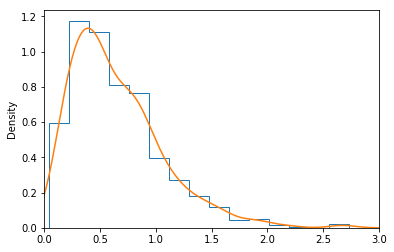

In [39]:
#normalize the histogram so that the area under it is just one -> set density to True
china1965.income.plot(kind="hist",histtype="step", bins=30, density=True)
china1965.income.plot(kind="density")

plt.axis(xmin=0,xmax=3)

It is important to remember that the density plot is just an approximation since we don't have access to the entire distribution. And the approximation is dependent on the scale of the smoothing, which is chosen automatically for us but which we can set directly by setting the bandwidth, or bw, I can obtain more detail, or more small thing. 

(0, 3, 0.0, 1.308676977766925)

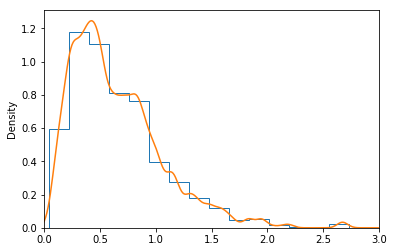

In [46]:
#normalize the histogram so that the area under it is just one -> set density to True
china1965.income.plot(kind="hist",histtype="step", bins=30, density=True)

#change smoothing
china1965.income.plot(kind="density", bw_method=0.1)

plt.axis(xmin=0,xmax=3)

#### Compare China and the US, 1965
using log income.


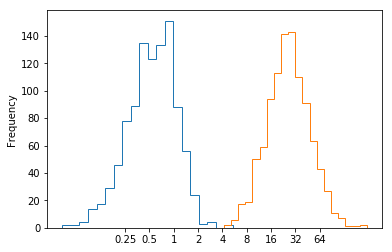

In [62]:
china1965.log10_income.plot.hist(histtype='step',bins=20)
usa1965.log10_income.plot.hist(histtype='step',bins=20)

#To understand this better, show you the x-axis ticks in dollars. 
#show levels of a quarter, half a dollar, one, two, and up in multiples of two. 
levels = [0.25,0.5,1,2,4,8,16,32,64]
#call matplolib xticks with the location of the levels and the labels.
pp.xticks(np.log10(levels),levels); 

In [61]:
#my log10
print(np.log10([0.01,0.1,1,10,100,1000,10000]))
print(np.log10([0.25,0.5,1,2,4,8,16,32,64,128]))

[-2. -1.  0.  1.  2.  3.  4.]
[-0.60205999 -0.30103     0.          0.30103     0.60205999  0.90308999
  1.20411998  1.50514998  1.80617997  2.10720997]


In 1965, there's basically no overlap. So the poorest Americans are richer than the richest Chinese. 

#### Compare China and the US, 2015
Let's see how things are in 2015. 

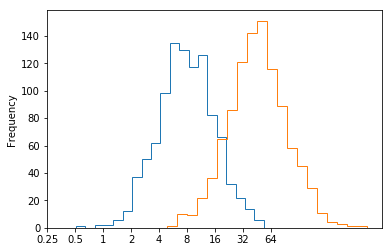

In [49]:
china2015.log10_income.plot.hist(histtype='step',bins=20)
usa2015.log10_income.plot.hist(histtype='step',bins=20)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

Very different. Both the Chinese and the Americans are richer, but there's also significant overlap. 

#### Compare China and the US, 2015, Weighted
In fact, let's see if we can rescale the histograms to show the relative sizes of the population. I will get population data from our gapminder.csv data set.


In [64]:
gapminder = pd.read_csv('lynda_data/gapminder.csv')

In [67]:
#select population -> need a single number, not a panda series, so I will cast it using float
china_pop2015 = float(gapminder.query('country == "China" and year == 2015').population)
usa_pop2015 = float(gapminder.query('country == "United States" and year == 2015').population)

china_pop2015, usa_pop2015

(1376048943.0, 321773631.0)

So we have 1.4 billions and 320 million, respectively. 

For the weighted histogram, I'm going to create a new weight column for the two data sets. The weight will be the population divided by the number of records. I have done the cast already, actually, so I don't need float. And same for the US.


In [73]:
china2015['weight'] = china_pop2015 / len(china2015)
usa2015['weight'] = usa_pop2015 / len(usa2015)

print(china2015['weight'][0])
print(usa2015['weight'][0])

1376048.943
321773.631


Copy the code for the histogram and add the weights. 


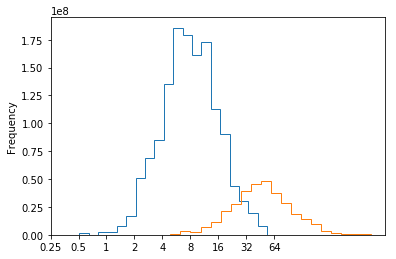

In [69]:
china2015.log10_income.plot.hist(histtype='step',bins=20,weights=china2015.weight)
usa2015.log10_income.plot.hist(histtype='step',bins=20,weights=usa2015.weight)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

Rosling points out that there is a lot of purchasing power in the richer end of the Chinese population where it overlaps with the US. So corporations would do well to tap that market.